In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
train_df = pd.read_csv("train_set.csv")
train_df

FileNotFoundError: [Errno 2] No such file or directory: 'train_set.csv'

In [6]:
img = cv2.imread("train/happy/00007.jpg", 0) 
img.shape

(48, 48)

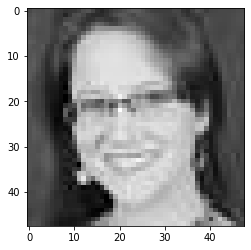

In [8]:
plt.imshow(img, cmap = 'gray')

In [10]:
train_df = train_df.sample(frac=1)

In [12]:
train_df

,label,id_img,path
0,happy,22373,happy/22373.jpg
1,happy,21433,happy/21433.jpg
2,happy,12418,happy/12418.jpg
3,happy,21278,happy/21278.jpg
4,happy,8081,happy/08081.jpg
...,...,...,...
6171,sadness,11346,sadness/11346.jpg
6172,sadness,4441,sadness/04441.jpg
6173,sadness,15236,sadness/15236.jpg
6174,sadness,27361,sadness/27361.jpg


In [14]:
train_df.label = train_df.label.replace('sadness', 0)
train_df.label = train_df.label.replace('happy', 1)

In [16]:
%%time
train_df['array'] = train_df.path.apply(lambda x: cv2.imread(f'train/{x}', 0))

Wall time: 1.48 s


In [18]:
#%%time
#train_set['array2'] =  [cv2.imread(f'train/{x}', 0) for x in train_set.path]        otra manera

In [20]:
train_df

,label,id_img,path,array
0,1,22373,happy/22373.jpg,"[[25, 44, 56, 68, 88, 98, 93, 92, 105, 120, 13..."
1,1,21433,happy/21433.jpg,"[[33, 29, 22, 18, 19, 23, 22, 19, 20, 23, 14, ..."
2,1,12418,happy/12418.jpg,"[[35, 43, 66, 84, 71, 41, 36, 53, 97, 56, 100,..."
3,1,21278,happy/21278.jpg,"[[118, 124, 132, 126, 127, 139, 67, 38, 33, 29..."
4,1,8081,happy/08081.jpg,"[[201, 209, 193, 107, 106, 107, 98, 114, 144, ..."
...,...,...,...,...
6171,0,11346,sadness/11346.jpg,"[[167, 180, 196, 171, 101, 50, 52, 70, 55, 49,..."
6172,0,4441,sadness/04441.jpg,"[[163, 154, 128, 116, 121, 106, 90, 99, 115, 1..."
6173,0,15236,sadness/15236.jpg,"[[109, 25, 29, 33, 55, 65, 82, 87, 147, 179, 1..."
6174,0,27361,sadness/27361.jpg,"[[62, 64, 67, 52, 57, 65, 50, 55, 117, 179, 15..."


In [22]:
labels2 = train_df.label.values

In [24]:
labels2

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [32]:
train_images = np.stack(train_df.array)
#train_labels = np.array(train_df.label)

In [33]:

train_images = train_images/255.0

In [35]:
train_images.shape

(6176, 48, 48)

In [36]:
train_images = np.asarray(train_images).reshape(6176, 48, 48, 1)

In [37]:
#train_images = train_images.reshape(6176, 48, 48, 1)

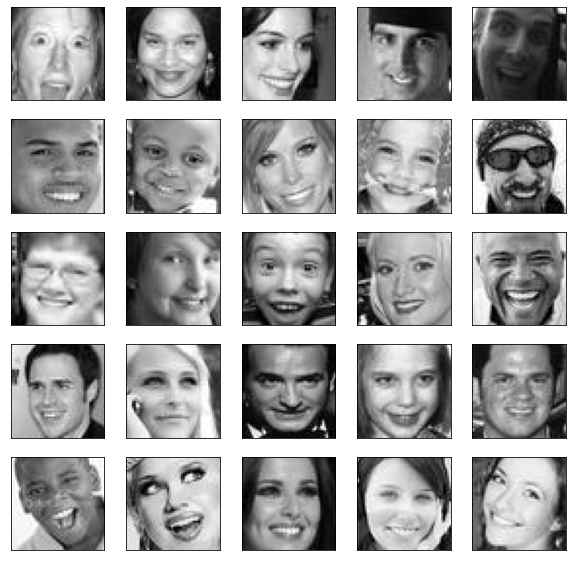

In [38]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
plt.show()

In [39]:
model1 = models.Sequential()
model1.add(layers.Conv2D(filters=8,
                        kernel_size=(3, 3),
                        input_shape=(48, 48, 1),
                        activation="relu",
                        padding='same'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Dropout(0.20))
model1.add(layers.Dense(32, activation="relu"))
model1.add(layers.Flatten())
model1.add(layers.Dense(16, activation="relu"))
model1.add(layers.Dense(32, activation="relu"))
model1.add(layers.Dense(2, activation="sigmoid"))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 8)         0         
_________________________________________________________________
dense (Dense)                (None, 24, 24, 32)        288       
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                294928    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                5

In [40]:
optimizer =  tf.keras.optimizers.Adam(learning_rate=0.01)

In [41]:
model1.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [42]:
model1.fit(train_images, labels2, epochs=20, shuffle=True)

Epoch 1/20


ValueError: in user code:

    C:\Users\Gman\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\Gman\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Gman\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Gman\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Gman\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Gman\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\Gman\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:755 train_step
        loss = self.compiled_loss(
    C:\Users\Gman\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Gman\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\Gman\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Gman\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Gman\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\losses.py:1608 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    C:\Users\Gman\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Gman\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\backend.py:4979 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    C:\Users\Gman\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Gman\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\nn_impl.py:173 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((32, 2) vs (32, 1))


In [21]:
train_images.shape, train_labels.shape

((6176, 48, 48, 1), (6176,))

In [109]:
test_df = pd.read_csv('C:\\DATA_SCIENCE\\DEEP_LEARNING\\Competition Kaggle 26_02_21\\test_set.csv')

In [110]:
test_df

,id_img,path
0,18341,test/18341.jpg
1,13176,test/13176.jpg
2,23945,test/23945.jpg
3,15968,test/15968.jpg
4,18382,test/18382.jpg
...,...,...
4112,8966,test/08966.jpg
4113,12111,test/12111.jpg
4114,16629,test/16629.jpg
4115,24322,test/24322.jpg


In [111]:
test_df['array'] = test_df.path.apply(lambda x: cv2.imread(f'{x}', 0))

In [112]:
test_df

,id_img,path,array
0,18341,test/18341.jpg,"[[124, 69, 19, 5, 8, 9, 18, 34, 23, 4, 0, 2, 7..."
1,13176,test/13176.jpg,"[[7, 3, 2, 5, 5, 2, 2, 5, 46, 35, 37, 37, 19, ..."
2,23945,test/23945.jpg,"[[88, 78, 136, 145, 128, 75, 203, 130, 178, 14..."
3,15968,test/15968.jpg,"[[254, 255, 255, 255, 254, 254, 254, 255, 255,..."
4,18382,test/18382.jpg,"[[9, 2, 8, 25, 12, 55, 143, 140, 89, 70, 56, 6..."
...,...,...,...
4112,8966,test/08966.jpg,"[[168, 168, 168, 169, 169, 169, 170, 170, 162,..."
4113,12111,test/12111.jpg,"[[11, 14, 15, 12, 9, 10, 12, 14, 9, 9, 9, 9, 1..."
4114,16629,test/16629.jpg,"[[131, 89, 70, 158, 246, 81, 70, 86, 87, 83, 8..."
4115,24322,test/24322.jpg,"[[20, 27, 28, 23, 29, 45, 56, 55, 46, 57, 108,..."


In [113]:
test_images = np.stack(test_df.array)

In [114]:
test_images = test_images/255

In [115]:
test_images = test_images.reshape(4117, 48, 48, 1)

In [116]:
test_images.shape

(4117, 48, 48, 1)

In [117]:
prediction = model.predict(test_images)

In [118]:
type(prediction), prediction.shape

(numpy.ndarray, (4117, 1))

In [119]:
prediction = prediction.reshape(4117)

In [120]:
pd.DataFrame(prediction).value_counts()

1.0    4117
dtype: int64

In [121]:
model.save('C:\\DATA_SCIENCE\\DEEP_LEARNING\\Competition Kaggle 26_02_21\\model1')

INFO:tensorflow:Assets written to: C:\DATA_SCIENCE\DEEP_LEARNING\Competition Kaggle 26_02_21\model1\assets


In [122]:
model.save('C:\\DATA_SCIENCE\\DEEP_LEARNING\\Competition Kaggle 26_02_21\\model1.h5')

In [123]:
submission = pd.DataFrame({"id_img": test_df["id_img"], "label": prediction})
submission

,id_img,label
0,18341,1.0
1,13176,1.0
2,23945,1.0
3,15968,1.0
4,18382,1.0
...,...,...
4112,8966,1.0
4113,12111,1.0
4114,16629,1.0
4115,24322,1.0


In [124]:
submission = submission.replace(1, 'happy')
submission = submission.replace(0, 'sadness')

In [125]:
submission

,id_img,label
0,18341,happy
1,13176,happy
2,23945,happy
3,15968,happy
4,18382,happy
...,...,...
4112,8966,happy
4113,12111,happy
4114,16629,happy
4115,24322,happy


In [126]:
submission.to_csv("first.csv", index = False)